In [22]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy import pi, mean

matplotlib.rcParams['figure.dpi'] = 200

In [16]:
Ns = [64, 128, 256]

profs_jld2 = {}
scalars_jld2 = {}

for N in Ns:
    profs_jld2[N] = "/home/alir/data/N" + str(N) + "/stratified_couette_Re4250_Ri0.010_Nz64_profiles.jld2"
    scalars_jld2[N] = "/home/alir/data/N" + str(N) + "/stratified_couette_Re4250_Ri0.010_Nz64_scalars.jld2"

In [34]:
profs = {}
scalars = {}

for N in Ns:
    profs[N] = h5py.File(profs_jld2[N])
    scalars[N] = h5py.File(scalars_jld2[N])

In [35]:
# List of iterations with output.
pIs = {}
sIs = {}

for N in Ns:
    pIs[N] = sorted(list(map(int, list(profs[N]["timeseries/t"].keys()))))
    sIs[N] = sorted(list(map(int, list(scalars[N]["timeseries/t"].keys()))))

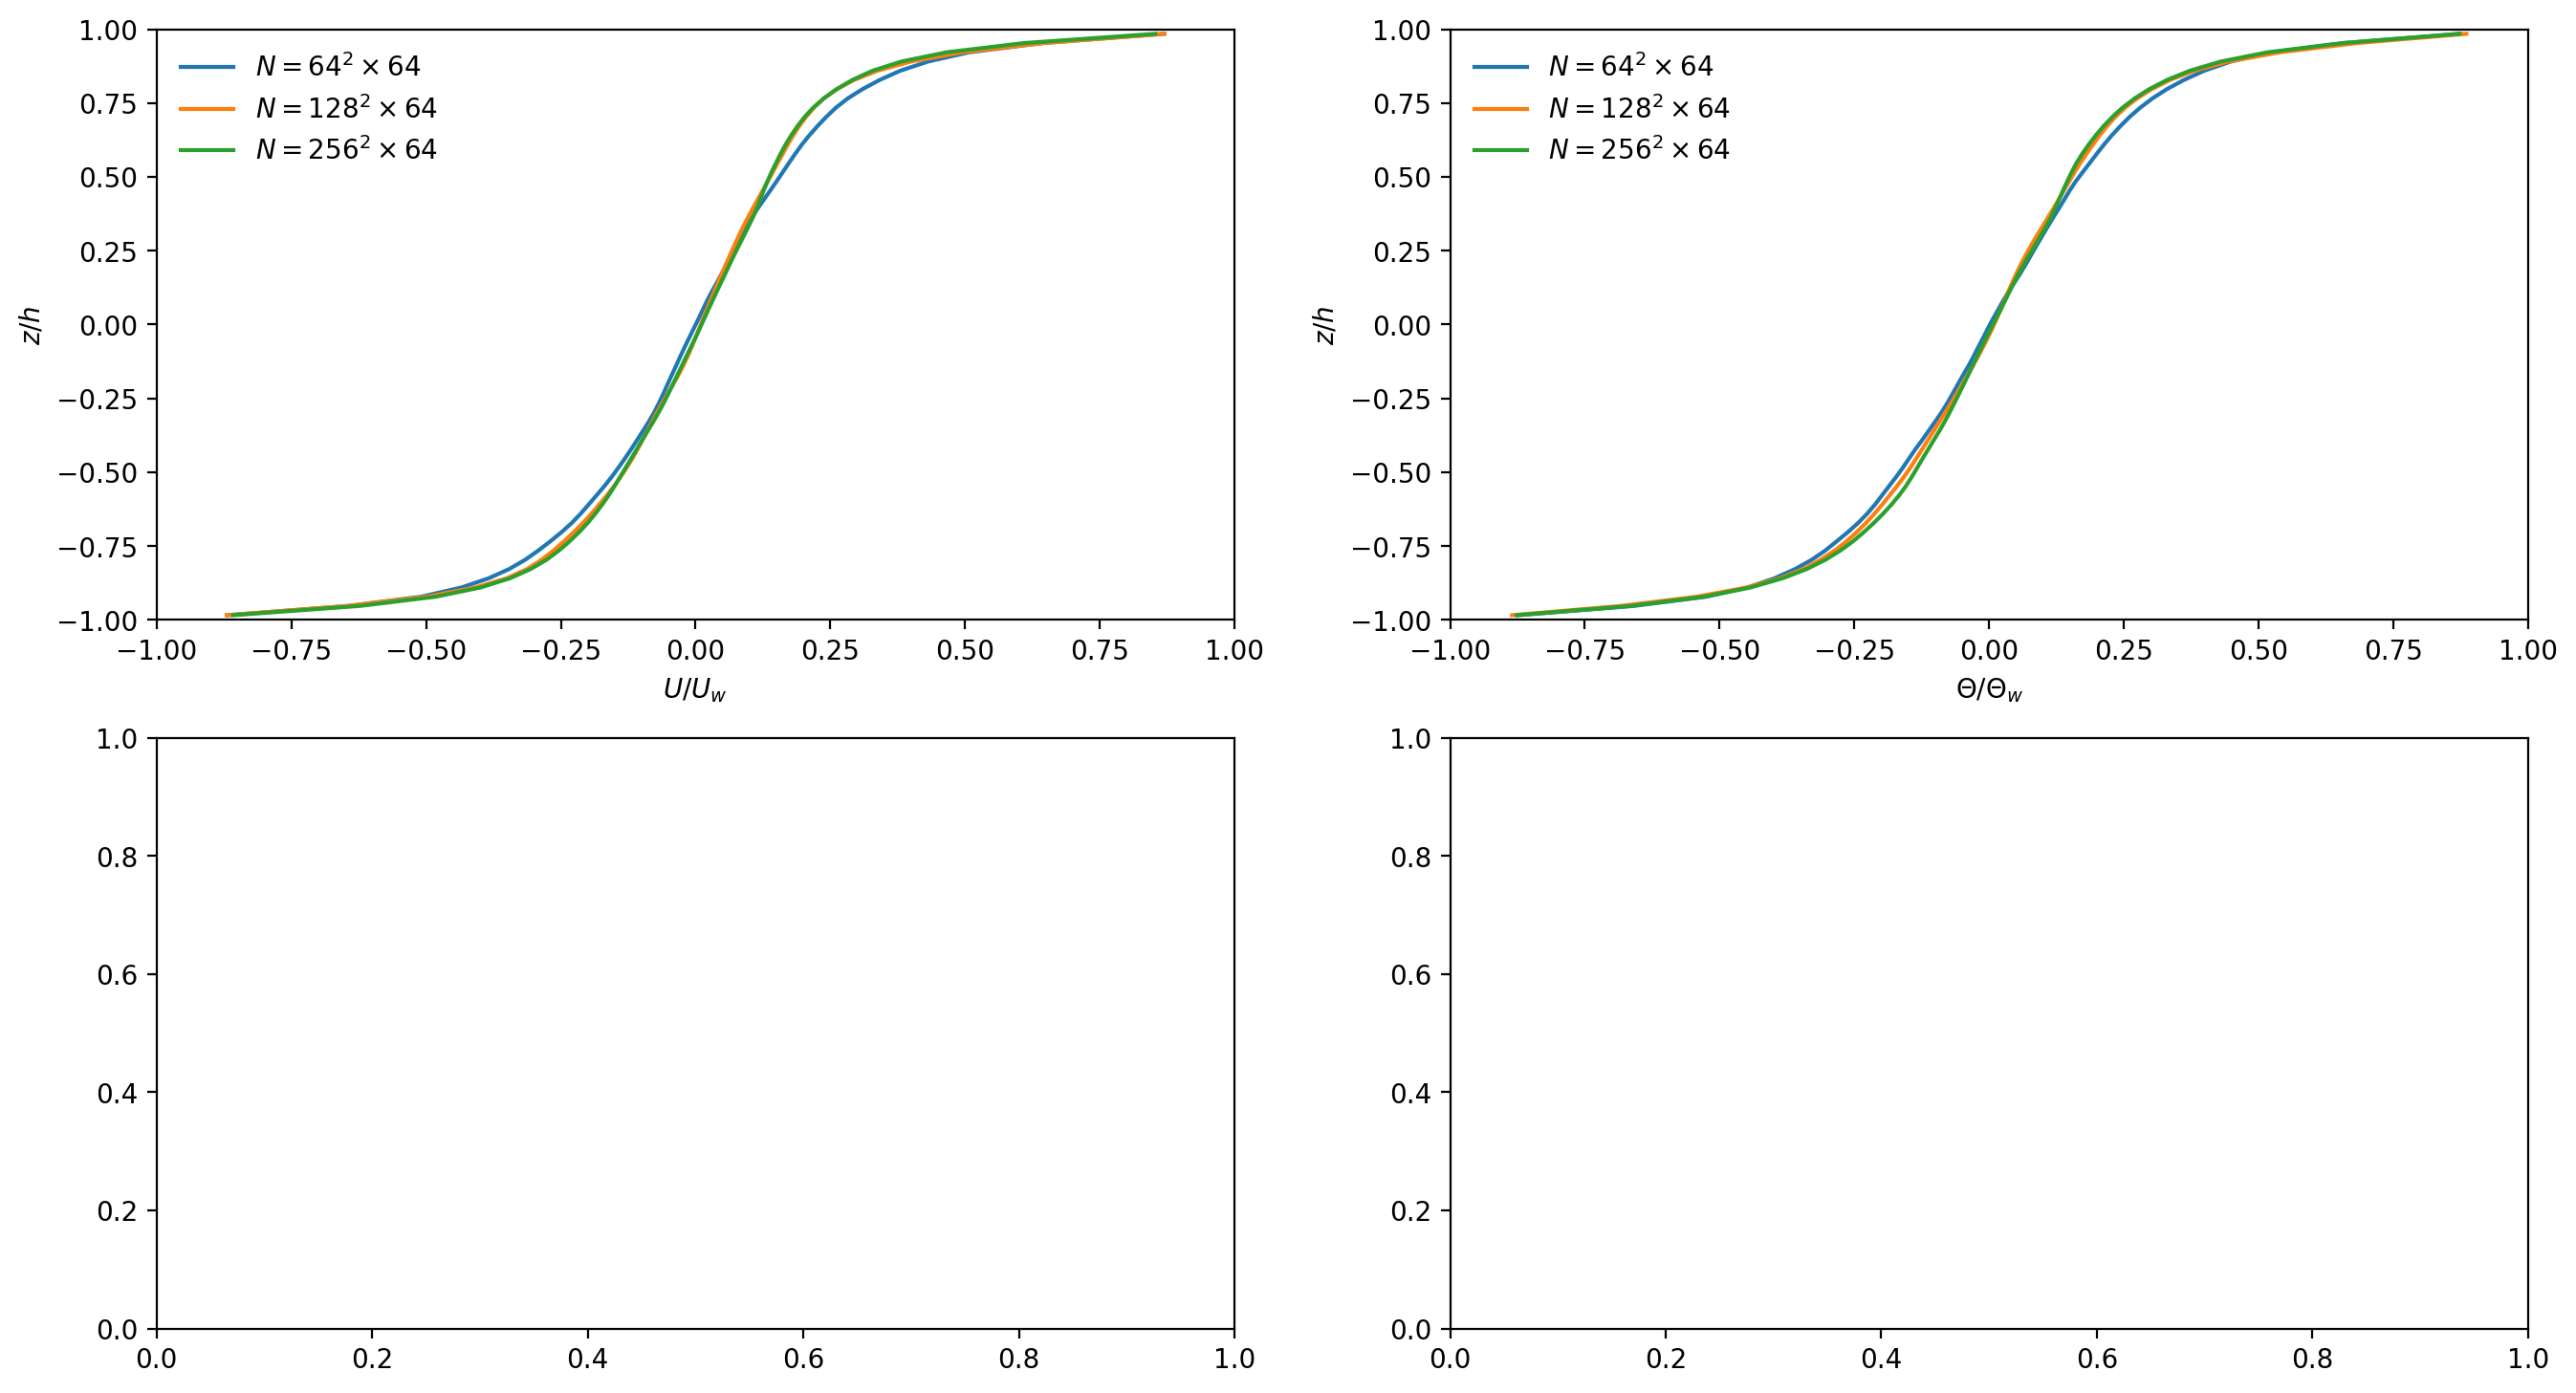

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

for N in Ns:
    i = pIs[N][-1]
    Uw = profs[N]["parameters/wall_velocity"]
    Tw = profs[N]["parameters/wall_temperature"]

    t = profs[N]["timeseries/t/" + str(i)][()]
    z = profs[N]["grid/zC"][()]

    U = profs[N]["timeseries/u/" + str(i)][()][1:-1, 0, 0]
    T = profs[N]["timeseries/T/" + str(i)][()][1:-1, 0, 0]
    
    ax1.plot(U/Uw, z+1, label=r"$N = {:d}^2 \times 64$".format(N))
    ax2.plot(T/Tw, z+1, label=r"$N = {:d}^2 \times 64$".format(N))

ax1.set_xlabel(r"$U/U_w$")
ax1.set_ylabel(r"$z/h$")
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.legend(frameon=False)

ax2.set_xlabel(r"$\Theta/\Theta_w$")
ax2.set_ylabel(r"$z/h$")
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.legend(frameon=False)

# j = fIs[-1]
# t = fields["timeseries/t/" + str(i)][()]
# U_k = fields["timeseries/u/" + str(j)][()][1, 1:-1, 1:-1]
# T_k = fields["timeseries/T/" + str(j)][()][1, 1:-1, 1:-1]

# im3 = ax3.pcolormesh(x/pi, y/pi, U_k / Uw, cmap="viridis")
# ax3.set_title(r"$u(x,y)/U_w$ @ $z={:.2f}$, $t={:.0f}$".format(z[1], t), fontsize=10)
# ax3.set_xlabel(r"$x/\pi$")
# ax3.set_ylabel(r"$y/\pi$")
# fig.colorbar(im3, ax=ax3)

# im4 = ax4.pcolormesh(x/pi, y/pi, T_k / Tw, cmap="inferno")
# ax4.set_title(r"$\theta(x,y)/\Theta_w$ @ $z={:.2f}$, $t={:.0f}$".format(z[1], t), fontsize=10)
# ax4.set_xlabel(r"$x/\pi$")
# ax4.set_ylabel(r"$y/\pi$")
# fig.colorbar(im4, ax=ax4)

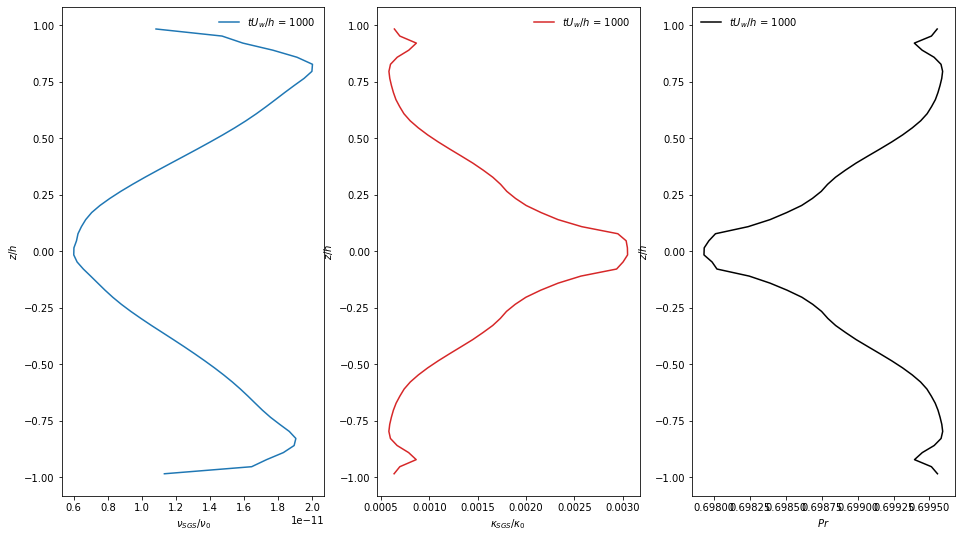

In [7]:
nu = fields["parameters/viscosity"][()]
kappa = fields["parameters/diffusivity"][()]

i = fIs[-1]
t = fields["timeseries/t/" + str(i)][()]

V = fields["timeseries/nu/" + str(i)][()][1:-1, 1:-1, 1:-1]
K = fields["timeseries/kappaT/" + str(i)][1:-1, 1:-1, 1:-1]
Pr = V / K

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

ax1.plot(mean((V - nu) / nu, axis=(1,2)), z+1, color="tab:blue", label=r"$tU_w/h$ = {:.0f}".format(t))
ax1.set_xlabel(r"$\nu_{SGS}/\nu_0$")
ax1.set_ylabel(r"$z/h$")
ax1.legend(frameon=False)

ax2.plot(mean((K - kappa) / kappa, axis=(1,2)), z+1, color="tab:red", label=r"$tU_w/h$ = {:.0f}".format(t))
ax2.set_xlabel(r"$\kappa_{SGS}/\kappa_0$")
ax2.set_ylabel(r"$z/h$")
ax2.legend(frameon=False)

ax3.plot(mean(Pr, axis=(1,2)), z+1, color="black", label=r"$tU_w/h$ = {:.0f}".format(t))
ax3.set_xlabel(r"$Pr$")
ax3.set_ylabel(r"$z/h$")
ax3.legend(frameon=False)

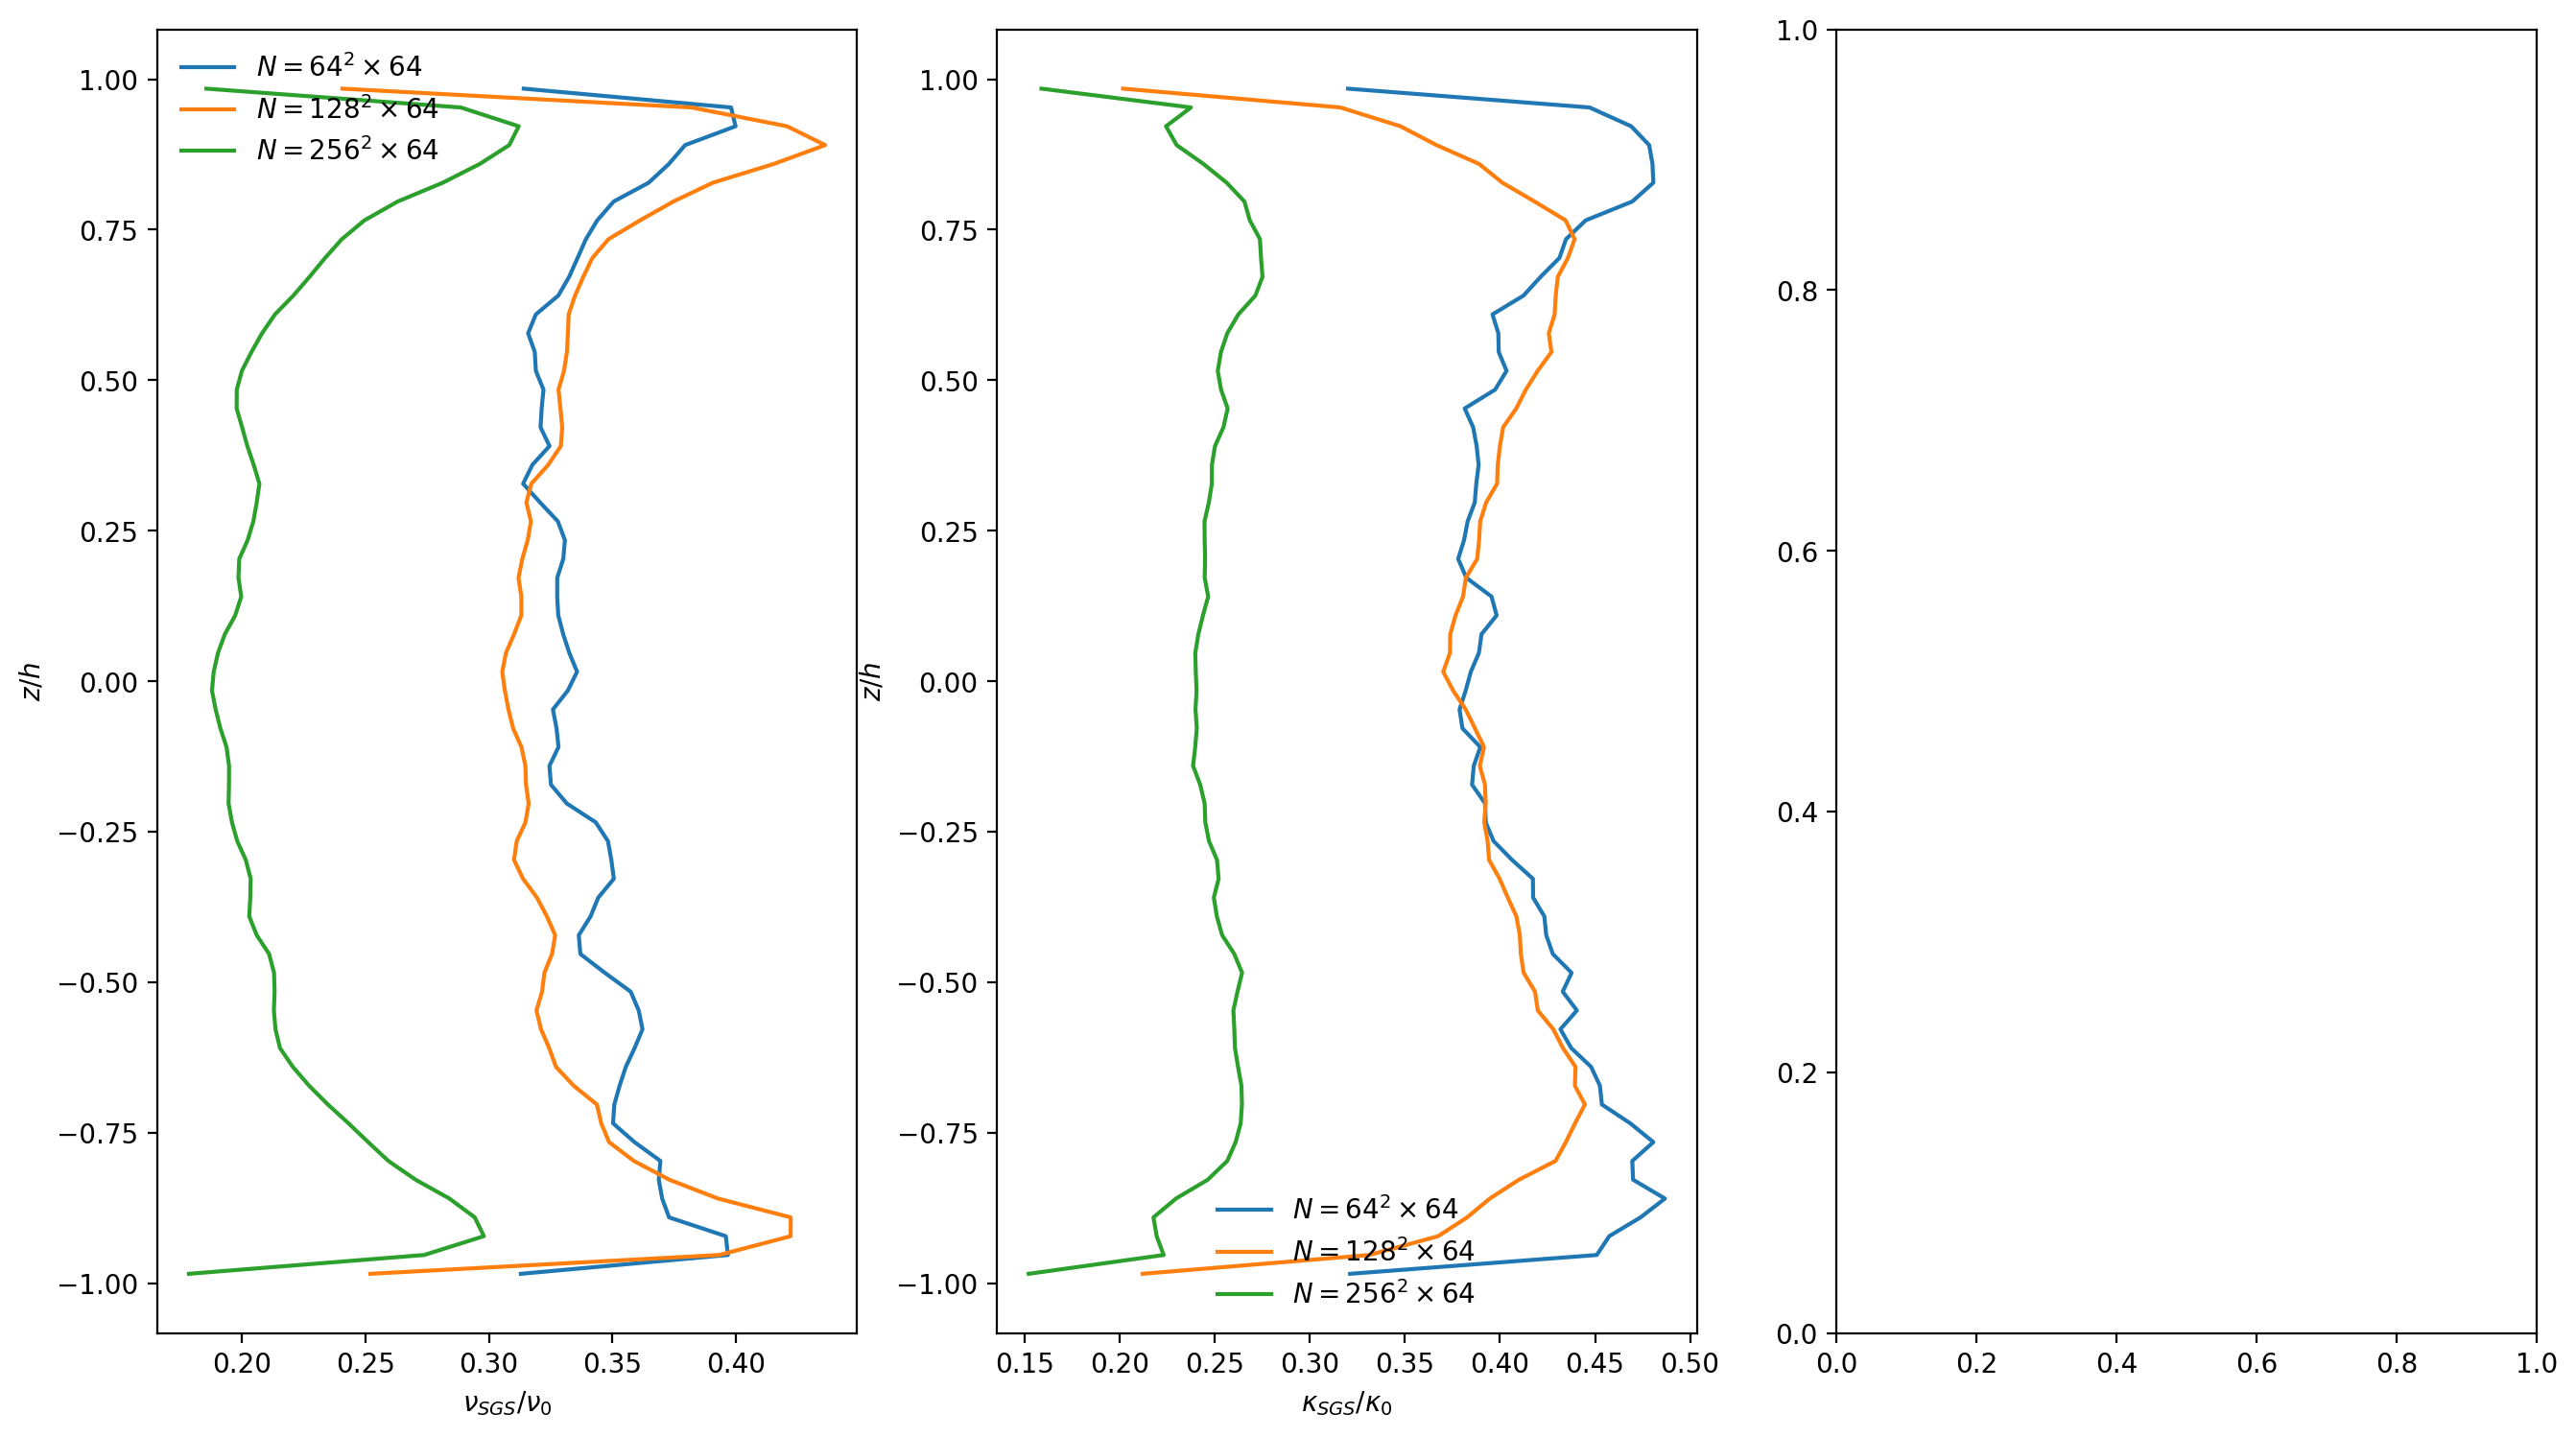

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

for N in Ns:
    nu = profs[N]["parameters/viscosity"][()]
    kappa = profs[N]["parameters/diffusivity"][()]

    i = pIs[N][-1]
    t = profs[N]["timeseries/t/" + str(i)][()]

    V = profs[N]["timeseries/nu/" + str(i)][()][1:-1, 0, 0]
    K = profs[N]["timeseries/kappaT/" + str(i)][1:-1, 0, 0]
    # Pr = V / K
    
    ax1.plot((V - nu) / nu, z+1, label=r"$N = {:d}^2 \times 64$".format(N))
    ax2.plot((K - kappa) / kappa, z+1, label=r"$N = {:d}^2 \times 64$".format(N))

ax1.set_xlabel(r"$\nu_{SGS}/\nu_0$")
ax1.set_ylabel(r"$z/h$")
ax1.legend(frameon=False)

ax2.set_xlabel(r"$\kappa_{SGS}/\kappa_0$")
ax2.set_ylabel(r"$z/h$")
ax2.legend(frameon=False)

In [38]:
scalars[64]

<HDF5 file "stratified_couette_Re4250_Ri0.010_Nz64_scalars.jld2" (mode r+)>

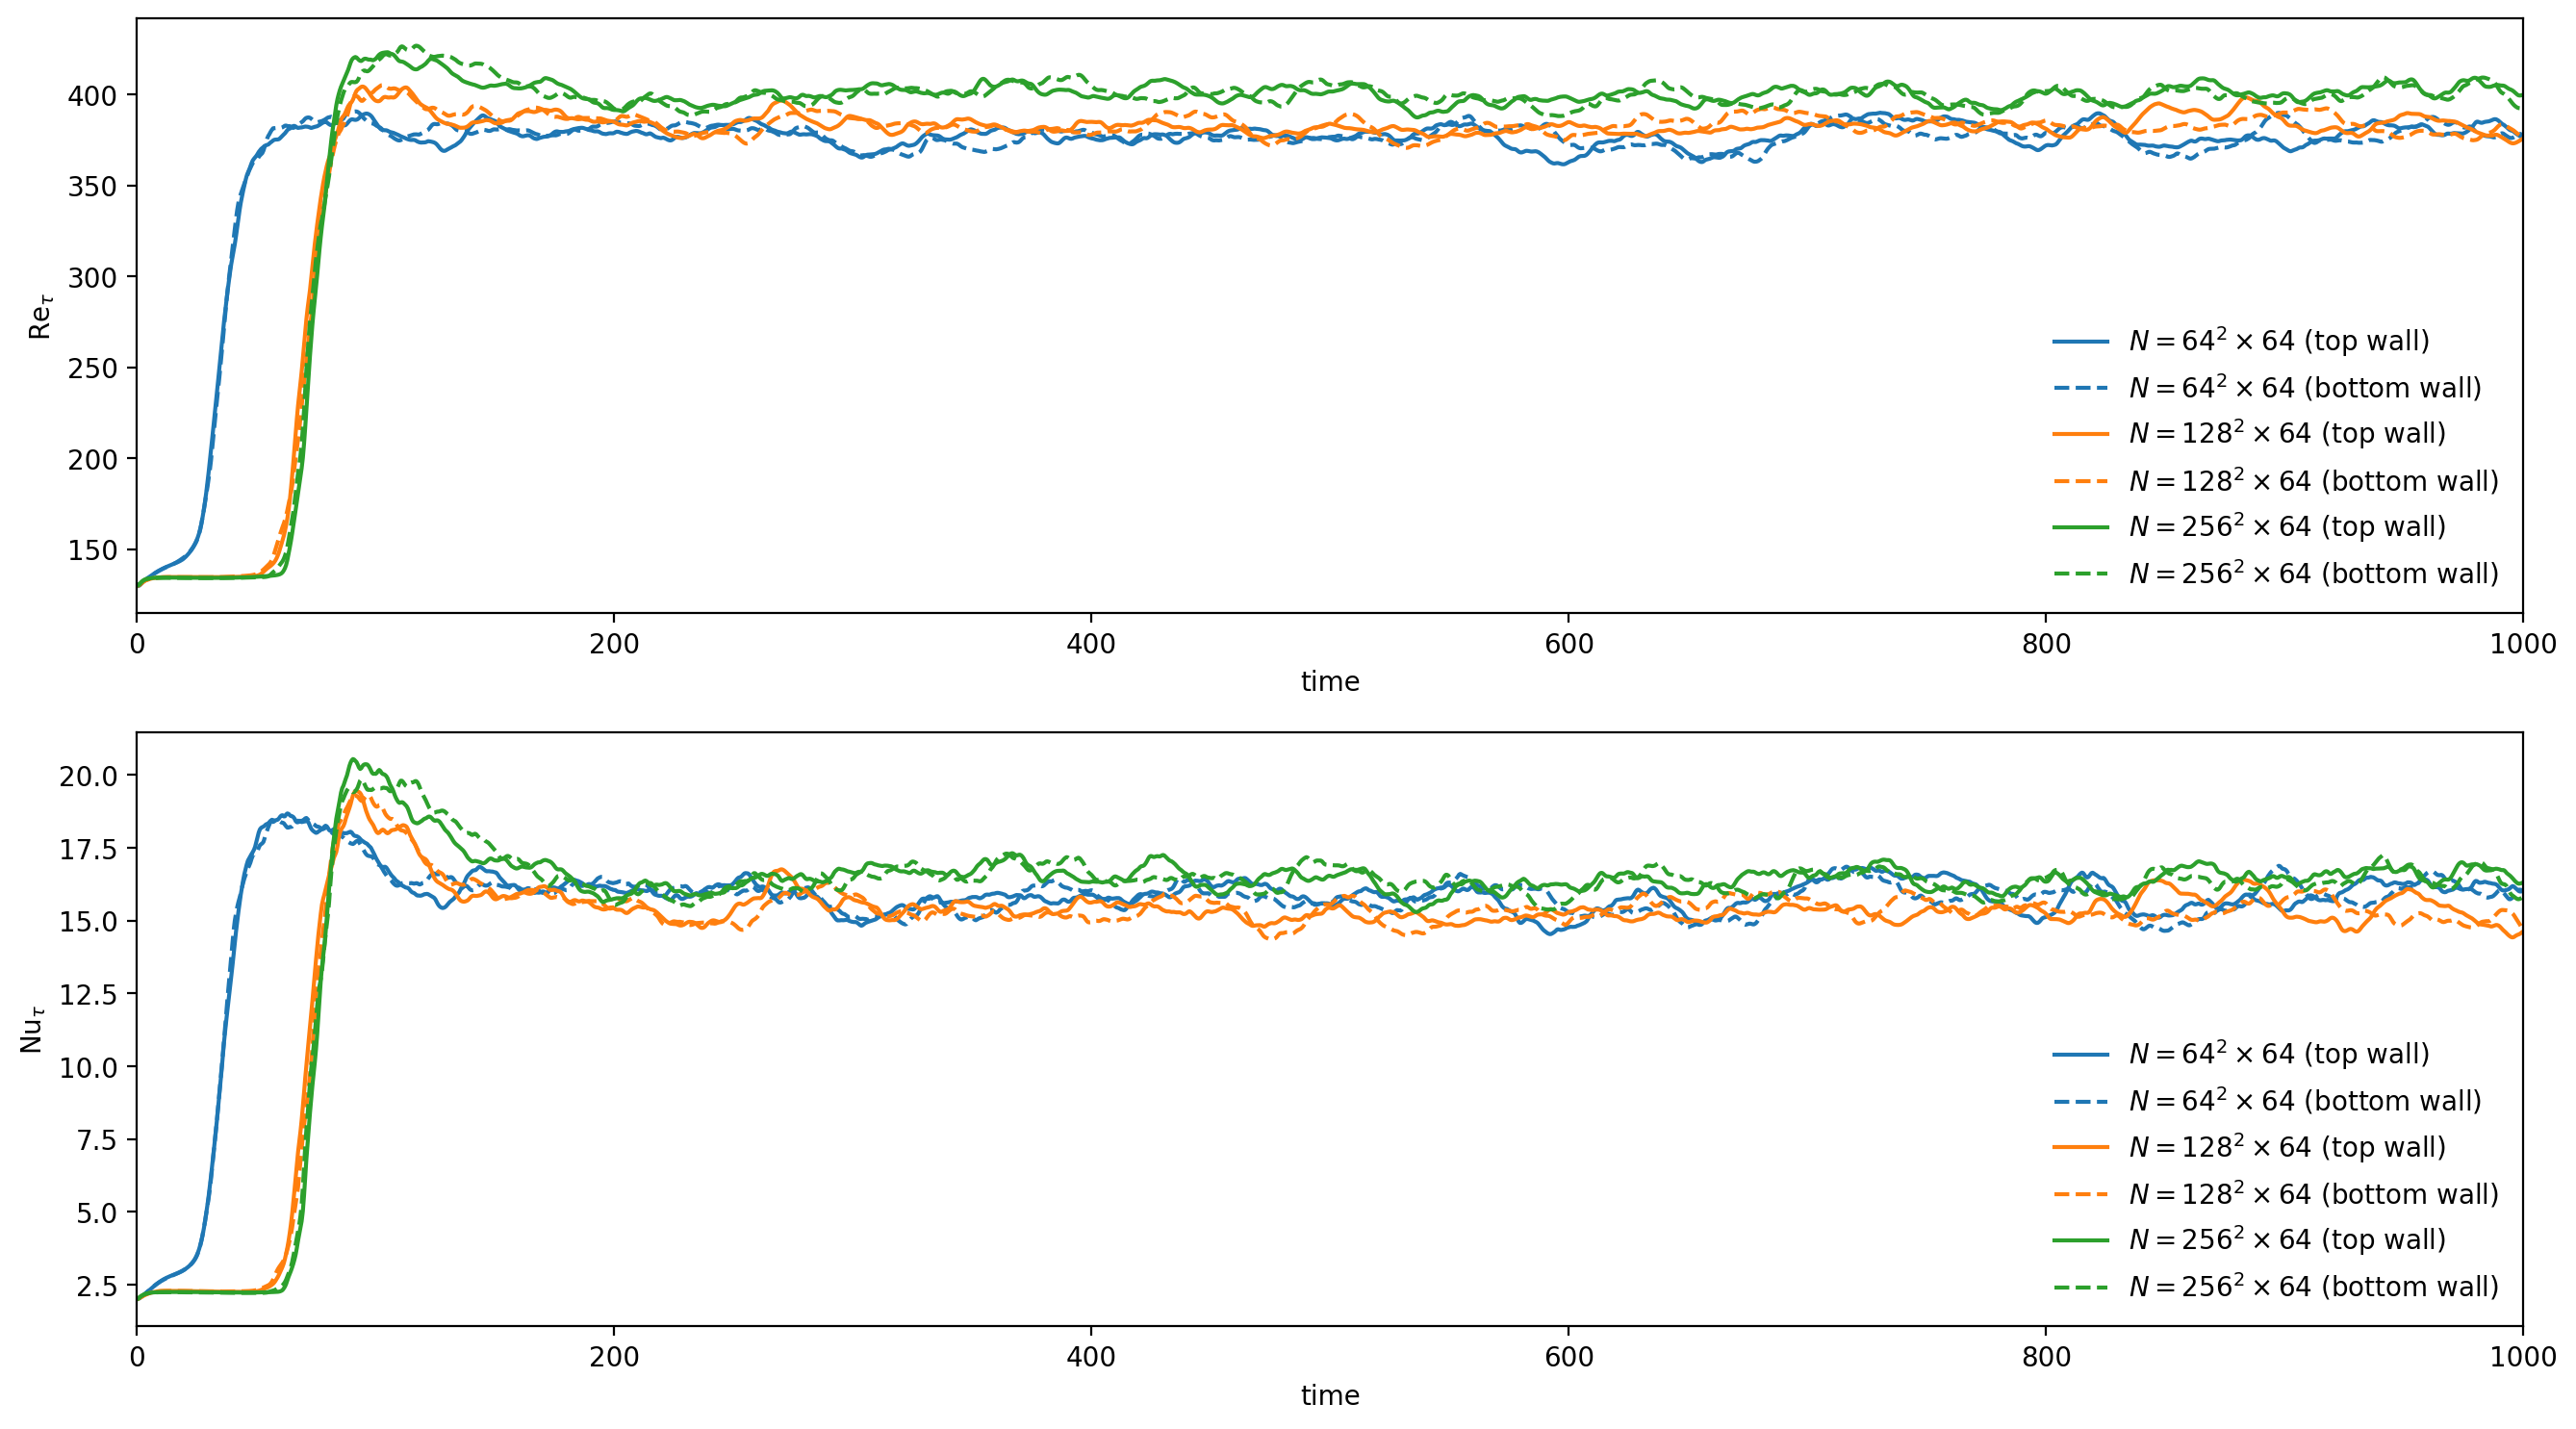

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 9))

c = {64: "tab:blue", 128: "tab:orange", 256: "tab:green"}

for N in Ns:
    i = sIs[N][-1]

    t = [scalars[N]["timeseries/t/" + str(i)][()] for i in sIs[N]]
    ReT = [scalars[N]["timeseries/Re_tau/" + str(i)][()][0] for i in sIs[N]]
    ReB = [scalars[N]["timeseries/Re_tau/" + str(i)][()][1] for i in sIs[N]]
    NuT = [scalars[N]["timeseries/Nu_tau/" + str(i)][()][0] for i in sIs[N]]
    NuB = [scalars[N]["timeseries/Nu_tau/" + str(i)][()][1] for i in sIs[N]]

    ax1.plot(t, ReT, color=c[N], label=r"$N = {:d}^2 \times 64$ (top wall)".format(N))
    ax1.plot(t, ReB, color=c[N], linestyle="--", label=r"$N = {:d}^2 \times 64$ (bottom wall)".format(N))
    
    ax2.plot(t, NuT, color=c[N], label=r"$N = {:d}^2 \times 64$ (top wall)".format(N))
    ax2.plot(t, NuB, color=c[N], linestyle="--", label=r"$N = {:d}^2 \times 64$ (bottom wall)".format(N))

ax1.set_xlabel("time")
ax1.set_ylabel(r"Re$_\tau$")
ax1.set_xlim([0, 1000])
ax1.legend(frameon=False)

ax2.set_xlabel("time")
ax2.set_ylabel(r"Nu$_\tau$")
ax2.set_xlim([0, 1000])
ax2.legend(frameon=False)